In [ ]:
reset()

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
import math
%matplotlib widget
import warnings
warnings.filterwarnings('ignore')

### LOAD DATASET

In [2]:
def load_dataset(path):
    d_train = pd.read_csv(path, header=0, delimiter=',')
    return d_train

os.getcwd()
path = 'C:/Users/julia/Documents/JULIA/UNI/3r/kaggle/train_gr'
os.chdir(path)
os.getcwd()
d_train = load_dataset('train.csv')
d_overview = load_dataset('game_overview.csv')

os.getcwd()
path = 'C:/Users/julia/Documents/JULIA/UNI/3r/kaggle/test_gr'
os.chdir(path)
os.getcwd()
d_test = load_dataset('test.csv')

In [3]:
print("Dimensionalitat de la BBDD train:", d_train.shape)
print("Dimensionalitat de la BBDD test:", d_test.shape)
print("Nombre de valors no existents:")
print(d_train.isnull().sum())
print(d_test.isnull().sum())
#eliminar id i year
#predir user_suggestion from user_review

Dimensionalitat de la BBDD train: (17494, 5)
Dimensionalitat de la BBDD test: (8045, 4)
Nombre de valors no existents:
review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64
review_id       0
title           0
year           67
user_review     0
dtype: int64


##### Observem que tenim valors inexistents a la variable de l'any.

##### La variable review_id l'eliminarem perquè només és un índex i no ens aporta informació.
##### Crearem una nova variable que ens diu quantes lletres té cada review.
##### Crearem una nova variable que contingui la informació de title, year i review de forma concatenada. (ens serà útil per quan fem el train amb diferents models).

In [4]:
d_train.insert(3, 'words', d_train["user_review"].apply(lambda s: len(s.split())))
d_train = d_train.drop(['review_id'], axis=1)
d_train['title'] = [s.replace(" ", "") for s in d_train['title']]
d_train.insert(2, 'year_s', [str(s) for s in d_train['year']])
d_train.insert(0, 'title_review', d_train['title'] + " " + d_train['year_s'] + " " + d_train["user_review"])

In [5]:
d_train.columns

Index(['title_review', 'title', 'year', 'year_s', 'words', 'user_review',
       'user_suggestion'],
      dtype='object')

In [6]:
d_train.head() 

,title_review,title,year,year_s,words,user_review,user_suggestion
0,Spooky'sJumpScareMansion 2016.0 I'm scared and...,Spooky'sJumpScareMansion,2016.0,2016.0,132,I'm scared and hearing creepy voices. So I'll...,1
1,"Spooky'sJumpScareMansion 2016.0 Best game, mor...",Spooky'sJumpScareMansion,2016.0,2016.0,44,"Best game, more better than Sam Pepper's YouTu...",1
2,Spooky'sJumpScareMansion 2016.0 A littly iffy ...,Spooky'sJumpScareMansion,2016.0,2016.0,70,"A littly iffy on the controls, but once you kn...",1
3,"Spooky'sJumpScareMansion 2015.0 Great game, fu...",Spooky'sJumpScareMansion,2015.0,2015.0,47,"Great game, fun and colorful and all that.A si...",1
4,Spooky'sJumpScareMansion 2015.0 Not many games...,Spooky'sJumpScareMansion,2015.0,2015.0,67,Not many games have the cute tag right next to...,1


#### A continuació veiem les correlacions entre els atributs numèrics. Veiwm que entre l'atribut objectiu (suggestion) i els altres dos stributs (letters i year) i ha una correlació bastant petita.

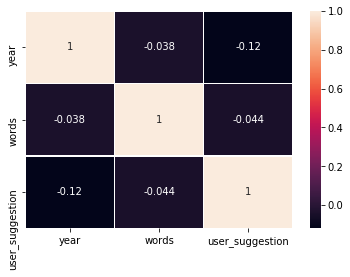

In [7]:
plt.figure()
ax = sns.heatmap(d_train.corr(), annot=True, linewidths=.5)

#### Veiem que tenim més suggestions de classe 1 que 0

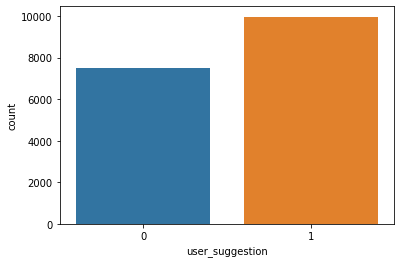

In [8]:
plt.figure()
sns.countplot(d_train["user_suggestion"])
plt.show()